In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# importing data
data=pd.read_csv('airline_accidents.csv')
data=data.loc[:150951,:]
data.sample(15)

<ipython-input-7-5b844a03d712>:2: DtypeWarning: Columns (0,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('airline_accidents.csv')


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
49075,20001213X33747,Accident,ATL86FA156,06/02/1986,"PETERSON, AL",United States,,,,,...,Unknown,(DBA: [EMS]),3,0,0,0,VMC,MANEUVERING,,
25619,20001207X04421,Accident,ATL95LA167,09/10/1995,"MOORESVILLE, NC",United States,,,,,...,Personal,,0,0,0,2,VMC,CRUISE,04/01/1996,
5517,20050429X00527,Accident,CHI05LA086,04/02/2005,"Waunakee, WI",United States,43.178611,-89.451389,6P3,Waunakee,...,Personal,,,,,2,VMC,LANDING,09/13/2005,
98292,83728,,FTW74DRG57,01/28/1974,"MARBLE FALLS, TX",United States,,,,,...,,,0,0,0,0,,,,
132978,20101,,MIA67D0441,03/18/1967,"OKEELANTA, FL",United States,,,,,...,,,0,0,0,0,,,,
120484,7215,,MIA70D0013,05/27/1969,"FT.MEYERS, FL",United States,,,,,...,,,0,0,0,0,,,,
99325,84222,,MIA74AM033,10/16/1973,"JAYUYA,PR, PR",United States,,,,,...,,,0,0,0,0,,,,
75472,38514,,LAX79DUQ16,02/24/1979,"SIMI VALLEY, CA",United States,,,,,...,,,0,0,0,0,,,,
75427,37681,,MKC79FCQ16,02/28/1979,"COFFEYVILLE, KS",United States,,,,,...,,,0,0,0,0,,,,
136889,75591,,MKC67D0053,07/14/1966,"WILBUR, NE",United States,,,,,...,,,0,0,0,0,,,,


In [ ]:
data[~data['Investigation Type'].isnull()]['Investigation Type']

0          Accident 
1          Accident 
2          Accident 
3          Accident 
4          Accident 
             ...    
150947              
150948              
150949              
150950              
150951     Accident 
Name: Investigation Type, Length: 150952, dtype: object

In [ ]:
data['Aircraft Category'].value_counts()

                  143199
 Airplane           6732
 Helicopter          760
 Glider              141
 Balloon              70
 Gyrocraft            36
 Ultralight            7
 Powered-Lift          3
 Blimp                 3
 Unknown               1
Name: Aircraft Category, dtype: int64

In [ ]:
data.shape

(150952, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150952 entries, 0 to 150951
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150952 non-null  object
 1   Investigation Type       150952 non-null  object
 2   Accident Number          150952 non-null  object
 3   Event Date               150952 non-null  object
 4   Location                 150952 non-null  object
 5   Country                  150952 non-null  object
 6   Latitude                 150952 non-null  object
 7   Longitude                150952 non-null  object
 8   Airport Code             150952 non-null  object
 9   Airport Name             150952 non-null  object
 10  Injury Severity          150952 non-null  object
 11  Aircraft Damage          150952 non-null  object
 12  Aircraft Category        150952 non-null  object
 13  Registration Number      150952 non-null  object
 14  Make                

In [ ]:
cols=data.columns
count_null=pd.DataFrame([],columns=["No of null"])
for i in cols:
  null_c=pd.DataFrame(data.loc[data[i]=='  ',i]).shape[0]
  count_null=count_null.append({'No of null':null_c},ignore_index=True)

count_null

<ipython-input-122-de407d38ddc1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_null=count_null.append({'No of null':null_c},ignore_index=True)
<ipython-input-122-de407d38ddc1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_null=count_null.append({'No of null':null_c},ignore_index=True)
<ipython-input-122-de407d38ddc1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_null=count_null.append({'No of null':null_c},ignore_index=True)
<ipython-input-122-de407d38ddc1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_null=count_null.append({'No of null':null_c},ignore_index=True)
<ipython-input-122-de407d38ddc1>:5: 

,No of null
0,0
1,87039
2,0
3,0
4,52
5,507
6,138978
7,138988
8,116089
9,113574


In [ ]:
data['Investigation Type'].value_counts()

              87039
 Accident     61694
 Incident      2219
Name: Investigation Type, dtype: int64

In [ ]:
# dropping columns with moe than 92% missing values
cols_todrop=['Latitude','Longitude','Event Id','Air Carrier','Unnamed: 30','Schedule','Airport Code','Airport Name','Report Publication Date']
data=data.drop(cols_todrop,axis=1)

In [ ]:
data

,Investigation Type,Accident Number,Event Date,Location,Country,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,...,Number of Engines,Engine Type,FAR Description,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight
0,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,Non-Fatal,Substantial,Airplane,N2800D,Piper,...,1,Reciprocating,Part 91: General Aviation,Instructional,,,,2,VMC,LANDING
1,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,Non-Fatal,Minor,,,Cessna,...,,,,Unknown,,,,1,,
2,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,...,1,Reciprocating,Part 91: General Aviation,Personal,,,,1,VMC,TAKEOFF
3,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,...,1,Reciprocating,Part 91: General Aviation,Personal,1,,,,VMC,MANEUVERING
4,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,Fatal(3),Substantial,Helicopter,N109AE,BELL,...,1,Turbo Shaft,Part 91: General Aviation,Other Work Use,3,0,0,0,VMC,MANEUVERING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,,NYC62A0005,01/16/1962,"LIMESTONE, ME",United States,Non-Fatal,,,N9903F,CURTISS-WRT,...,,,Part 91 General Aviation,,0,0,0,0,,
150948,,MIA62A0003,01/14/1962,"BIRMINGHAM, AL",United States,Non-Fatal,,,N5540,LOCKHEED,...,,,Part 121 Scheduled,,0,0,0,0,,
150949,,LAX62A0002,01/13/1962,"FILLMORE, CA",United States,Non-Fatal,,,N37538,DOUGLAS,...,,,Part 121 Scheduled,,0,0,0,0,,
150950,,MIA62A0001,01/01/1962,"CHARLOTTE, NC",United States,Non-Fatal,,,N2703R,FAIRCHILD,...,,,Part 121 Scheduled,,0,0,0,0,,


In [ ]:
data['Make'].value_counts()

 CESSNA              43260
 PIPER               28597
 BEECH                8552
 Cessna               7491
 Piper                3956
                     ...  
 Dennis Pointer          1
 Parkman                 1
 Dean                    1
 Aegerter, Simon         1
 BC65                    1
Name: Make, Length: 6246, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150952 entries, 0 to 150951
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Investigation Type      150952 non-null  object
 1   Accident Number         150952 non-null  object
 2   Event Date              150952 non-null  object
 3   Location                150952 non-null  object
 4   Country                 150952 non-null  object
 5   Injury Severity         150952 non-null  object
 6   Aircraft Damage         150952 non-null  object
 7   Aircraft Category       150952 non-null  object
 8   Registration Number     150952 non-null  object
 9   Make                    150952 non-null  object
 10  Model                   150952 non-null  object
 11  Amateur Built           150952 non-null  object
 12  Number of Engines       150952 non-null  object
 13  Engine Type             150952 non-null  object
 14  FAR Description         150952 non-n

In [ ]:
#function to replace spaces with nan
def replace_with_nan(j):
    for i in range(data.shape[0]):
       s=data.iloc[i,j]
       if s==' ' or s=='  ':
          data.iloc[i,j]=np.nan

for i in range(22):
  replace_with_nan(i)

data.isnull().sum()

Investigation Type         87039
Accident Number                0
Event Date                     0
Location                      52
Country                      507
Injury Severity                0
Aircraft Damage            88684
Aircraft Category         143199
Registration Number         1281
Make                          22
Model                        107
Amateur Built                102
Number of Engines          89587
Engine Type                88491
FAR Description            56154
Purpose of Flight          88758
Total Fatal Injuries       11401
Total Serious Injuries     12510
Total Minor Injuries       11933
Total Uninjured             5913
Weather Condition          87547
Broad Phase of Flight      89228
dtype: int64

In [ ]:
data=data.drop(['FAR Description','Aircraft Category','Location'],axis=1)
data


,Investigation Type,Accident Number,Event Date,Country,Injury Severity,Aircraft Damage,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight
0,Accident,SEA08CA056,12/31/2007,United States,Non-Fatal,Substantial,N2800D,Piper,PA-12,No,1,Reciprocating,Instructional,NaN,NaN,NaN,2,VMC,LANDING
1,Accident,CHI08WA075,12/31/2007,United Kingdom,Non-Fatal,Minor,NaN,Cessna,T303,No,NaN,NaN,Unknown,NaN,NaN,NaN,1,NaN,NaN
2,Accident,CHI08CA057,12/30/2007,United States,Non-Fatal,Substantial,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Personal,NaN,NaN,NaN,1,VMC,TAKEOFF
3,Accident,LAX08FA043,12/30/2007,United States,Fatal(1),Substantial,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Personal,1,NaN,NaN,NaN,VMC,MANEUVERING
4,Accident,NYC08FA071,12/30/2007,United States,Fatal(3),Substantial,N109AE,BELL,206L-3,No,1,Turbo Shaft,Other Work Use,3,0,0,0,VMC,MANEUVERING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,NaN,NYC62A0005,01/16/1962,United States,Non-Fatal,NaN,N9903F,CURTISS-WRT,C-46F,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN
150948,NaN,MIA62A0003,01/14/1962,United States,Non-Fatal,NaN,N5540,LOCKHEED,188,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN
150949,NaN,LAX62A0002,01/13/1962,United States,Non-Fatal,NaN,N37538,DOUGLAS,DC-6,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN
150950,NaN,MIA62A0001,01/01/1962,United States,Non-Fatal,NaN,N2703R,FAIRCHILD,F-27,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN


In [ ]:
# Dealing with make
for i in range(data.shape[0]):
  if type(data.loc[i,'Make'])!=float:
     s=data.loc[i,'Make']
     data.loc[i,'Make']=s.upper()

In [ ]:
data['Make'].value_counts()

 CESSNA                   50751
 PIPER                    32553
 BEECH                    10252
 BELL                      4357
 BOEING                    3356
                          ...  
 FIESELER FLUGZEUGBAU         1
 BOGNUDA LIVIO                1
 NICKS                        1
 HUNDERE                      1
 BC65                         1
Name: Make, Length: 5663, dtype: int64

In [ ]:
# filling nan with the make with max frequency
data['Make']=data['Make'].fillna('CESSNA')

In [ ]:
# making a new feature event year,
import re
yr=pd.DataFrame([],columns=["Event Year"])
for i in range(data.shape[0]):
   s=data.iloc[i,2]
   reg=re.compile(r'\d+/\d+/(\d+)')
   mo=reg.search(s)
   res=mo.group(1)
   yr.loc[i,'Event Year']=res

data=data.drop('Event Date',axis=1)
data=pd.concat([data,yr],axis=1)


In [ ]:
data['Amateur Built']=data['Amateur Built'].fillna('No')

In [ ]:
data

,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,Accident,SEA08CA056,United States,Non-Fatal,Substantial,N2800D,PIPER,PA-12,No,1,Reciprocating,Instructional,NaN,NaN,NaN,2,VMC,LANDING,2007
1,Accident,CHI08WA075,United Kingdom,Non-Fatal,Minor,NaN,CESSNA,T303,No,NaN,NaN,Unknown,NaN,NaN,NaN,1,NaN,NaN,2007
2,Accident,CHI08CA057,United States,Non-Fatal,Substantial,N5093F,LEROHL,RV-8,Yes,1,Reciprocating,Personal,NaN,NaN,NaN,1,VMC,TAKEOFF,2007
3,Accident,LAX08FA043,United States,Fatal(1),Substantial,N254SR,CIRRUS DESIGN CORP.,SR22,No,1,Reciprocating,Personal,1,NaN,NaN,NaN,VMC,MANEUVERING,2007
4,Accident,NYC08FA071,United States,Fatal(3),Substantial,N109AE,BELL,206L-3,No,1,Turbo Shaft,Other Work Use,3,0,0,0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,NaN,NYC62A0005,United States,Non-Fatal,NaN,N9903F,CURTISS-WRT,C-46F,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150948,NaN,MIA62A0003,United States,Non-Fatal,NaN,N5540,LOCKHEED,188,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150949,NaN,LAX62A0002,United States,Non-Fatal,NaN,N37538,DOUGLAS,DC-6,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150950,NaN,MIA62A0001,United States,Non-Fatal,NaN,N2703R,FAIRCHILD,F-27,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962


In [ ]:
data['Country'].value_counts()

 United States     147345
 Mexico               415
 Bahamas              326
 Canada               291
 Germany              106
                    ...  
 Croatia                1
 Malta                  1
 Bangladesh             1
 Ivory Coast            1
 Wake Island            1
Name: Country, Length: 167, dtype: int64

In [ ]:
data['Country']=data['Country'].fillna('United States')

In [ ]:
data.dropna(thresh=8,inplace=True)
data.shape

(150951, 19)

In [ ]:
data.isnull().sum()

Investigation Type        87039
Accident Number               0
Country                       0
Injury Severity               0
Aircraft Damage           88683
Registration Number        1280
Make                          0
Model                       106
Amateur Built                 0
Number of Engines         89586
Engine Type               88490
Purpose of Flight         88757
Total Fatal Injuries      11400
Total Serious Injuries    12509
Total Minor Injuries      11932
Total Uninjured            5912
Weather Condition         87546
Broad Phase of Flight     89227
Event Year                    0
dtype: int64

In [ ]:
data['Total Uninjured'].value_counts()

 0       53398
0        52648
 1       18397
 2       11603
 3        3310
         ...  
 357         1
 232         1
 368         1
 287         1
 248         1
Name: Total Uninjured, Length: 343, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150951 entries, 0 to 150951
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Investigation Type      63912 non-null   object
 1   Accident Number         150951 non-null  object
 2   Country                 150951 non-null  object
 3   Injury Severity         150951 non-null  object
 4   Aircraft Damage         62268 non-null   object
 5   Registration Number     149671 non-null  object
 6   Make                    150951 non-null  object
 7   Model                   150845 non-null  object
 8   Amateur Built           150951 non-null  object
 9   Number of Engines       61365 non-null   object
 10  Engine Type             62461 non-null   object
 11  Purpose of Flight       62194 non-null   object
 12  Total Fatal Injuries    139551 non-null  object
 13  Total Serious Injuries  138442 non-null  object
 14  Total Minor Injuries    139019 non-n

In [ ]:
data.drop('Model',axis=1)

,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Registration Number,Make,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,Accident,SEA08CA056,United States,Non-Fatal,Substantial,N2800D,PIPER,No,1,Reciprocating,Instructional,NaN,NaN,NaN,2,VMC,LANDING,2007
1,Accident,CHI08WA075,United Kingdom,Non-Fatal,Minor,NaN,CESSNA,No,NaN,NaN,Unknown,NaN,NaN,NaN,1,NaN,NaN,2007
2,Accident,CHI08CA057,United States,Non-Fatal,Substantial,N5093F,LEROHL,Yes,1,Reciprocating,Personal,NaN,NaN,NaN,1,VMC,TAKEOFF,2007
3,Accident,LAX08FA043,United States,Fatal(1),Substantial,N254SR,CIRRUS DESIGN CORP.,No,1,Reciprocating,Personal,1,NaN,NaN,NaN,VMC,MANEUVERING,2007
4,Accident,NYC08FA071,United States,Fatal(3),Substantial,N109AE,BELL,No,1,Turbo Shaft,Other Work Use,3,0,0,0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,NaN,NYC62A0005,United States,Non-Fatal,NaN,N9903F,CURTISS-WRT,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150948,NaN,MIA62A0003,United States,Non-Fatal,NaN,N5540,LOCKHEED,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150949,NaN,LAX62A0002,United States,Non-Fatal,NaN,N37538,DOUGLAS,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962
150950,NaN,MIA62A0001,United States,Non-Fatal,NaN,N2703R,FAIRCHILD,No,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1962


In [ ]:
data=data.astype({'Number of Engines':'float64'})

In [ ]:
data=data.astype({'Total Uninjured':'float64'})
data=data.astype({'Total Fatal Injuries':'float64'})
data=data.astype({'Total Serious Injuries':'float64'})

In [ ]:
data['Total Uninjured']=data['Total Uninjured'].fillna(data['Total Uninjured'].median())

In [ ]:
data['Number of Engines']=data['Number of Engines'].fillna(data['Number of Engines'].median())

In [ ]:
data=data.astype({'Total Minor Injuries':'float64'})

In [ ]:
data['Total Fatal Injuries']=data['Total Fatal Injuries'].fillna(data['Total Fatal Injuries'].median())
data['Total Serious Injuries']=data['Total Serious Injuries'].fillna(data['Total Serious Injuries'].median())
data['Total Minor Injuries']=data['Total Minor Injuries'].fillna(data['Total Minor Injuries'].median())

data=data.drop('Registration Number',axis=1)
data

,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,Accident,SEA08CA056,United States,Non-Fatal,Substantial,PIPER,PA-12,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,LANDING,2007
1,Accident,CHI08WA075,United Kingdom,Non-Fatal,Minor,CESSNA,T303,No,1.0,NaN,Unknown,0.0,0.0,0.0,1.0,NaN,NaN,2007
2,Accident,CHI08CA057,United States,Non-Fatal,Substantial,LEROHL,RV-8,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,TAKEOFF,2007
3,Accident,LAX08FA043,United States,Fatal(1),Substantial,CIRRUS DESIGN CORP.,SR22,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,2007
4,Accident,NYC08FA071,United States,Fatal(3),Substantial,BELL,206L-3,No,1.0,Turbo Shaft,Other Work Use,3.0,0.0,0.0,0.0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,NaN,NYC62A0005,United States,Non-Fatal,NaN,CURTISS-WRT,C-46F,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1962
150948,NaN,MIA62A0003,United States,Non-Fatal,NaN,LOCKHEED,188,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1962
150949,NaN,LAX62A0002,United States,Non-Fatal,NaN,DOUGLAS,DC-6,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1962
150950,NaN,MIA62A0001,United States,Non-Fatal,NaN,FAIRCHILD,F-27,No,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1962


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150951 entries, 0 to 150951
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Investigation Type      63912 non-null   object 
 1   Accident Number         150951 non-null  object 
 2   Country                 150951 non-null  object 
 3   Injury Severity         150951 non-null  object 
 4   Aircraft Damage         62268 non-null   object 
 5   Make                    150951 non-null  object 
 6   Model                   150845 non-null  object 
 7   Amateur Built           150951 non-null  object 
 8   Number of Engines       150951 non-null  float64
 9   Engine Type             62461 non-null   object 
 10  Purpose of Flight       62194 non-null   object 
 11  Total Fatal Injuries    150951 non-null  float64
 12  Total Serious Injuries  150951 non-null  float64
 13  Total Minor Injuries    150951 non-null  float64
 14  Total Uninjured     

In [ ]:
#creating a new feature Degree Of Injury
degree=pd.DataFrame([],columns=['Injuries'])
for i in range(data.shape[0]):
   s=(data.iloc[i,11]+data.iloc[i,12]+data.iloc[i,13])
   degree.loc[i,'Injuries']=s

degree

,Injuries
0,0.0
1,0.0
2,0.0
3,1.0
4,3.0
...,...
150946,0.0
150947,0.0
150948,0.0
150949,0.0


In [ ]:
data=data.drop(['Total Fatal Injuries','Purpose of Flight','Total Serious Injuries','Total Minor Injuries'],axis=1)
data=pd.concat([degree,data],axis=1)

In [ ]:
data.isnull().sum()

Injuries                     1
Investigation Type       87040
Accident Number              1
Country                      1
Injury Severity              1
Aircraft Damage          88684
Make                         1
Model                      107
Amateur Built                1
Number of Engines            1
Engine Type              88491
Total Uninjured              1
Weather Condition        87547
Broad Phase of Flight    89228
Event Year                   1
dtype: int64

In [ ]:
data=data.drop(['Model'],axis=1)

In [ ]:
data

,Injuries,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Make,Amateur Built,Number of Engines,Engine Type,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,0.0,Accident,SEA08CA056,United States,Non-Fatal,Substantial,PIPER,No,1.0,Reciprocating,2.0,VMC,LANDING,2007
1,0.0,Accident,CHI08WA075,United Kingdom,Non-Fatal,Minor,CESSNA,No,1.0,NaN,1.0,NaN,NaN,2007
2,0.0,Accident,CHI08CA057,United States,Non-Fatal,Substantial,LEROHL,Yes,1.0,Reciprocating,1.0,VMC,TAKEOFF,2007
3,1.0,Accident,LAX08FA043,United States,Fatal(1),Substantial,CIRRUS DESIGN CORP.,No,1.0,Reciprocating,0.0,VMC,MANEUVERING,2007
4,3.0,Accident,NYC08FA071,United States,Fatal(3),Substantial,BELL,No,1.0,Turbo Shaft,0.0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150947,0.0,NaN,NYC62A0005,United States,Non-Fatal,NaN,CURTISS-WRT,No,1.0,NaN,0.0,NaN,NaN,1962
150948,0.0,NaN,MIA62A0003,United States,Non-Fatal,NaN,LOCKHEED,No,1.0,NaN,0.0,NaN,NaN,1962
150949,0.0,NaN,LAX62A0002,United States,Non-Fatal,NaN,DOUGLAS,No,1.0,NaN,0.0,NaN,NaN,1962
150950,2.0,NaN,MIA62A0001,United States,Non-Fatal,NaN,FAIRCHILD,No,1.0,NaN,0.0,NaN,NaN,1962


In [ ]:
# transforming the Injury Severity feature
data['Injury Severity'].value_counts()

 Non-Fatal      122062
 Fatal(1)        11887
 Fatal(2)         7337
 Incident         3648
 Fatal(3)         2452
                 ...  
 Fatal(228)          1
 Fatal(229)          1
 Fatal(217)          1
 Fatal(169)          1
 Fatal(95)           1
Name: Injury Severity, Length: 130, dtype: int64

In [ ]:
# Making a new Feature ----(No Of Deaths)
deaths=pd.DataFrame([],columns=['No Of Deaths'])
for i in range(data.shape[0]):
   s=data.iloc[i,4]
   if type(s)!=float:
     if 'Fatal' in s and 'Non' not in s:
       reg=re.compile(r'\w+\(?(\d+)?\)?')
       mo=reg.search(s)
       n=mo.group(1)
       deaths.loc[i,'No Of Deaths']=n
       data.iloc[i,4]='F'
     elif 'Non' in s and 'Fatal' in s:
       data.iloc[i,4]='N'
       deaths.loc[i,'No Of Deaths']=0

data=pd.concat([deaths,data],axis=1)

In [ ]:
data

,No Of Deaths,Injuries,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Make,Amateur Built,Number of Engines,Engine Type,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,0,0.0,Accident,SEA08CA056,United States,N,Substantial,PIPER,No,1.0,Reciprocating,2.0,VMC,LANDING,2007
1,0,0.0,Accident,CHI08WA075,United Kingdom,N,Minor,CESSNA,No,1.0,NaN,1.0,NaN,NaN,2007
2,0,0.0,Accident,CHI08CA057,United States,N,Substantial,LEROHL,Yes,1.0,Reciprocating,1.0,VMC,TAKEOFF,2007
3,1,1.0,Accident,LAX08FA043,United States,F,Substantial,CIRRUS DESIGN CORP.,No,1.0,Reciprocating,0.0,VMC,MANEUVERING,2007
4,3,3.0,Accident,NYC08FA071,United States,F,Substantial,BELL,No,1.0,Turbo Shaft,0.0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150300,NaN,0.0,NaN,MIA64I0081,United States,Incident,NaN,DOUGLAS,No,1.0,NaN,0.0,NaN,NaN,1964
150327,NaN,0.0,NaN,NYC65I0107,Portugal,Incident,NaN,BOEING 707,No,1.0,NaN,0.0,NaN,NaN,1964
150338,NaN,0.0,NaN,Unknown,United States,Incident,NaN,DOUGLAS,No,1.0,NaN,0.0,NaN,NaN,1964
150363,NaN,0.0,NaN,NYC64I0104,Canada,Incident,NaN,CANADAIR,No,1.0,NaN,0.0,NaN,NaN,1964


In [ ]:
data['No Of Deaths'].value_counts()

0      122062
1       11887
2        7337
3        2452
4        1863
        ...  
228         1
80          1
217         1
169         1
95          1
Name: No Of Deaths, Length: 128, dtype: int64

In [ ]:
data

,No Of Deaths,Injuries,Investigation Type,Accident Number,Country,Injury Severity,Aircraft Damage,Make,Amateur Built,Number of Engines,Engine Type,Total Uninjured,Weather Condition,Broad Phase of Flight,Event Year
0,0,0.0,Accident,SEA08CA056,United States,N,Substantial,PIPER,No,1.0,Reciprocating,2.0,VMC,LANDING,2007
1,0,0.0,Accident,CHI08WA075,United Kingdom,N,Minor,CESSNA,No,1.0,NaN,1.0,NaN,NaN,2007
2,0,0.0,Accident,CHI08CA057,United States,N,Substantial,LEROHL,Yes,1.0,Reciprocating,1.0,VMC,TAKEOFF,2007
3,1,1.0,Accident,LAX08FA043,United States,F,Substantial,CIRRUS DESIGN CORP.,No,1.0,Reciprocating,0.0,VMC,MANEUVERING,2007
4,3,3.0,Accident,NYC08FA071,United States,F,Substantial,BELL,No,1.0,Turbo Shaft,0.0,VMC,MANEUVERING,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150300,NaN,0.0,NaN,MIA64I0081,United States,Incident,NaN,DOUGLAS,No,1.0,NaN,0.0,NaN,NaN,1964
150327,NaN,0.0,NaN,NYC65I0107,Portugal,Incident,NaN,BOEING 707,No,1.0,NaN,0.0,NaN,NaN,1964
150338,NaN,0.0,NaN,Unknown,United States,Incident,NaN,DOUGLAS,No,1.0,NaN,0.0,NaN,NaN,1964
150363,NaN,0.0,NaN,NYC64I0104,Canada,Incident,NaN,CANADAIR,No,1.0,NaN,0.0,NaN,NaN,1964


In [ ]:
data=data.astype({'Event Year':'float64'})
data['Injuries'].value_counts()

0.0      121736
1.0       14675
2.0        8885
3.0        2413
4.0        1708
          ...  
102.0         1
105.0         1
179.0         1
88.0          1
97.0          1
Name: Injuries, Length: 124, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 0 to 150575
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No Of Deaths           147207 non-null  object 
 1   Injuries               150951 non-null  object 
 2   Investigation Type     63912 non-null   object 
 3   Accident Number        150951 non-null  object 
 4   Country                150951 non-null  object 
 5   Injury Severity        150951 non-null  object 
 6   Aircraft Damage        62268 non-null   object 
 7   Make                   150951 non-null  object 
 8   Amateur Built          150951 non-null  object 
 9   Number of Engines      150951 non-null  float64
 10  Engine Type            62461 non-null   object 
 11  Total Uninjured        150951 non-null  float64
 12  Weather Condition      63405 non-null   object 
 13  Broad Phase of Flight  61724 non-null   object 
 14  Event Year             150951 non-nu

In [ ]:
data=data.astype({'No Of Deaths':'float64','Injuries':'float64'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 0 to 150575
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No Of Deaths           147207 non-null  float64
 1   Injuries               150951 non-null  float64
 2   Investigation Type     63912 non-null   object 
 3   Accident Number        150951 non-null  object 
 4   Country                150951 non-null  object 
 5   Injury Severity        150951 non-null  object 
 6   Aircraft Damage        62268 non-null   object 
 7   Make                   150951 non-null  object 
 8   Amateur Built          150951 non-null  object 
 9   Number of Engines      150951 non-null  float64
 10  Engine Type            62461 non-null   object 
 11  Total Uninjured        150951 non-null  float64
 12  Weather Condition      63405 non-null   object 
 13  Broad Phase of Flight  61724 non-null   object 
 14  Event Year             150951 non-nu

In [ ]:
data['Injury Severity'].value_counts()

N                122062
F                 25145
 Incident          3648
 Unavailable         96
Name: Injury Severity, dtype: int64

In [ ]:
data['No Of Deaths']=data['No Of Deaths'].fillna(data['No Of Deaths'].median())

In [ ]:
# Assigning value to Investigation Type, use groupby by Injury Severity

data[data['No Of Deaths']>1]['Injury Severity'].value_counts()
# here we can see that if there is a single death then it's categorized as fatal

F    13108
Name: Injury Severity, dtype: int64

In [ ]:
data[data['Injury Severity']=='F']['Investigation Type'].value_counts()
# And if the Injury is 'Fatal', The type of Investigation would most probably be Accident
# So we could fill the Investigation Type feature based on this aspect

 Accident     12564
Name: Investigation Type, dtype: int64

In [ ]:
data[data['Injuries']>5]['Injury Severity'].value_counts()
# According to the data, It's death and not the no. of injuries which has a greater control on wheather an event is fatal or not

N                680
F                305
 Incident         25
 Unavailable       4
Name: Injury Severity, dtype: int64

In [ ]:
data['Injury Severity'].value_counts()

N    125806
F     25145
Name: Injury Severity, dtype: int64

In [ ]:
for i in range(data.shape[0]):
  x=data.iloc[i,5]
  if type(x)!=float:
    if x=='F':
      data.iloc[i,2]='Accident'
    elif x=='N':
      data.iloc[i,2]='Incident'

In [ ]:
data.isnull().sum()

No Of Deaths                 0
Injuries                     1
Investigation Type           1
Accident Number              1
Country                      1
Injury Severity              1
Aircraft Damage          88684
Make                         1
Amateur Built                1
Number of Engines            1
Engine Type              88491
Total Uninjured              1
Weather Condition        87547
Broad Phase of Flight    89228
Event Year                   1
dtype: int64

In [ ]:
data['Aircraft Damage'].value_counts()

 Substantial     44523
 Destroyed       15849
 Minor            1896
Name: Aircraft Damage, dtype: int64

In [ ]:
data[data['No Of Deaths']>1]['Amateur Built'].value_counts()

 No      12574
 Yes       512
No          22
Name: Amateur Built, dtype: int64

In [ ]:
for i in range(data.shape[0]):
  x=data.iloc[i,8]
  if type(x)!=float:
    if 'No' in x:
      data.iloc[i,8]='No'
    elif 'Yes' in x:
      data.iloc[i,8]='Yes'


In [ ]:
data['Amateur Built'].value_counts()

No     143523
Yes      7428
Name: Amateur Built, dtype: int64

In [ ]:
data[data['Amateur Built']=='Yes']['Aircraft Damage'].value_counts()
# half of the amateurly bulit ones led to Substantial damage(3700 out of 7400 amateur built)
#we could say that if a engine is built amateurly then there's a 75-80 percent chance of it being damaged
#substantially or being destroyed(5500 out of 7400)

 Substantial     3707
 Destroyed       1872
 Minor             43
Name: Aircraft Damage, dtype: int64

In [ ]:
data[data['Engine Type']=='Reciprocating']['Investigation Type']

Series([], Name: Investigation Type, dtype: object)

In [ ]:
data[data['Engine Type']=='Reciprocating']['Investigation Type'].value_counts()

Series([], Name: Investigation Type, dtype: int64)

In [ ]:
data['Country'].value_counts()
for i in range(data.shape[0]):
  s=data.iloc[i,4]
  if type(s)!=float:
    if 'United States' in s:
      data.iloc[i,4]='United States'
    else:
      data.iloc[i,4]='Other'
data['Country'].value_counts()

United States    147851
Other              3100
Name: Country, dtype: int64

In [ ]:
data[data['Country']=='Other']['Investigation Type'].value_counts()

Incident    1957
Accident    1143
Name: Investigation Type, dtype: int64

In [ ]:
n_accident_usa=data[data['Country']=='United States']['Investigation Type'].value_counts()[1]
n_accidents=data[data['Investigation Type']=='Accident'].shape[0]
percent_usa=n_accident_usa/n_accidents
n_accident_other=data[data['Country']=='Other']['Investigation Type'].value_counts()[1]
percent_other=n_accident_other/n_accidents

print("Percentage of accidents in the usa= ",(percent_usa*100))
print("          ")
print("Percentage of accidents in other countries",(percent_other*100))

Percentage of accidents in the usa=  95.454364684828
          
Percentage of accidents in other countries 4.545635315172002


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 0 to 150575
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No Of Deaths           150952 non-null  float64
 1   Injuries               150951 non-null  float64
 2   Investigation Type     150951 non-null  object 
 3   Accident Number        150951 non-null  object 
 4   Country                150951 non-null  object 
 5   Injury Severity        150951 non-null  object 
 6   Aircraft Damage        62268 non-null   object 
 7   Make                   150951 non-null  object 
 8   Amateur Built          150951 non-null  object 
 9   Number of Engines      150951 non-null  float64
 10  Engine Type            62461 non-null   object 
 11  Total Uninjured        150951 non-null  float64
 12  Weather Condition      63405 non-null   object 
 13  Broad Phase of Flight  61724 non-null   object 
 14  Event Year             150951 non-nu

In [ ]:
data=data.drop(['Broad Phase of Flight','Aircraft Damage'],axis=1)

In [ ]:
data[data['Investigation Type']=='Accident']['Engine Type'].value_counts()


 Reciprocating     10213
 Turbo Shaft         556
 Turbo Prop          543
 Unknown             437
 Turbo Fan           137
 Turbo Jet           110
 REC, TJ, TJ           1
Name: Engine Type, dtype: int64

In [ ]:
# Let's find out the maximum accidents in which weather condition
data[data['Investigation Type']=='Accident']['Weather Condition'].value_counts()
#Most of the accidents are in VMC conditions, but also we can't be absolutely sure as  VMC causes incidents too
# what can we be sure of is that VMC weather conditions affect the vehicles.

 VMC     9086
 IMC     2853
 UNK      434
Name: Weather Condition, dtype: int64

In [ ]:
data.isnull().sum()

No Of Deaths              0
Injuries                  1
Investigation Type        1
Accident Number           1
Country                   1
Injury Severity           1
Make                      1
Amateur Built             1
Number of Engines         1
Engine Type           88491
Total Uninjured           1
Weather Condition     87547
Event Year                1
dtype: int64

In [ ]:
data=data.drop(['Engine Type','Weather Condition'],axis=1)

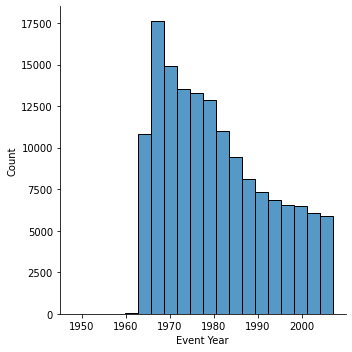

In [ ]:
#univariate analysis
sns.displot(data['Event Year'],bins=20)

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

No Of Deaths          0
Injuries              0
Investigation Type    0
Accident Number       0
Country               0
Injury Severity       0
Make                  0
Amateur Built         0
Number of Engines     0
Total Uninjured       0
Event Year            0
dtype: int64

In [ ]:
import seaborn as sns

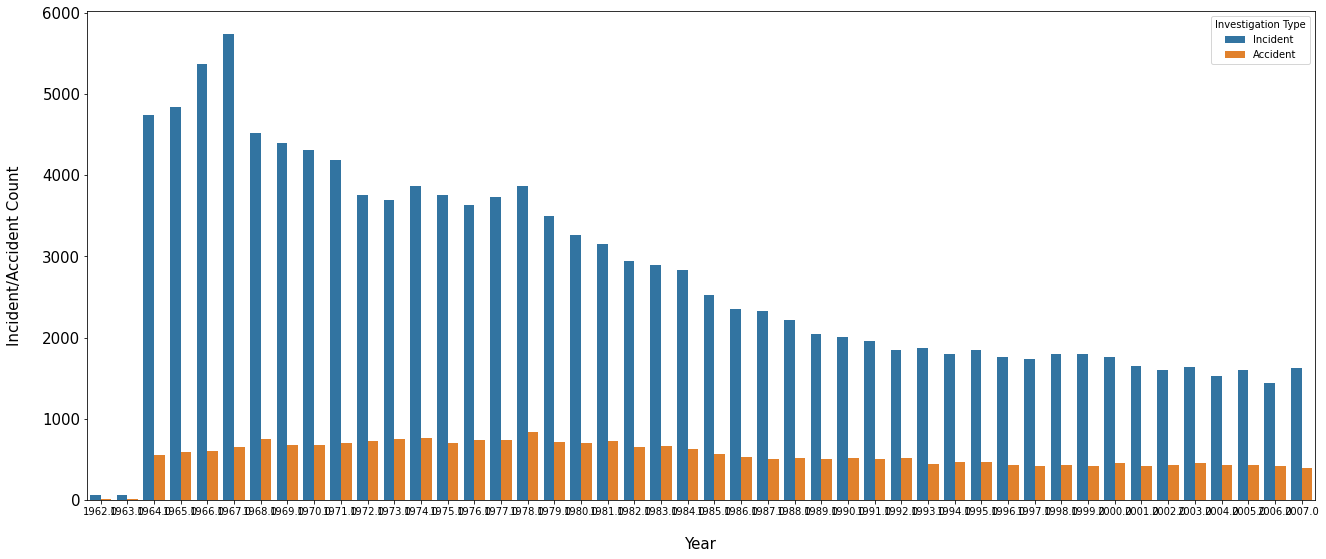

In [ ]:
# Incident/accident count vs event year
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Event Year', hue='Investigation Type', data=data)

plt.xlabel('Year', size=15, labelpad=20)
plt.ylabel('Incident/Accident Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)


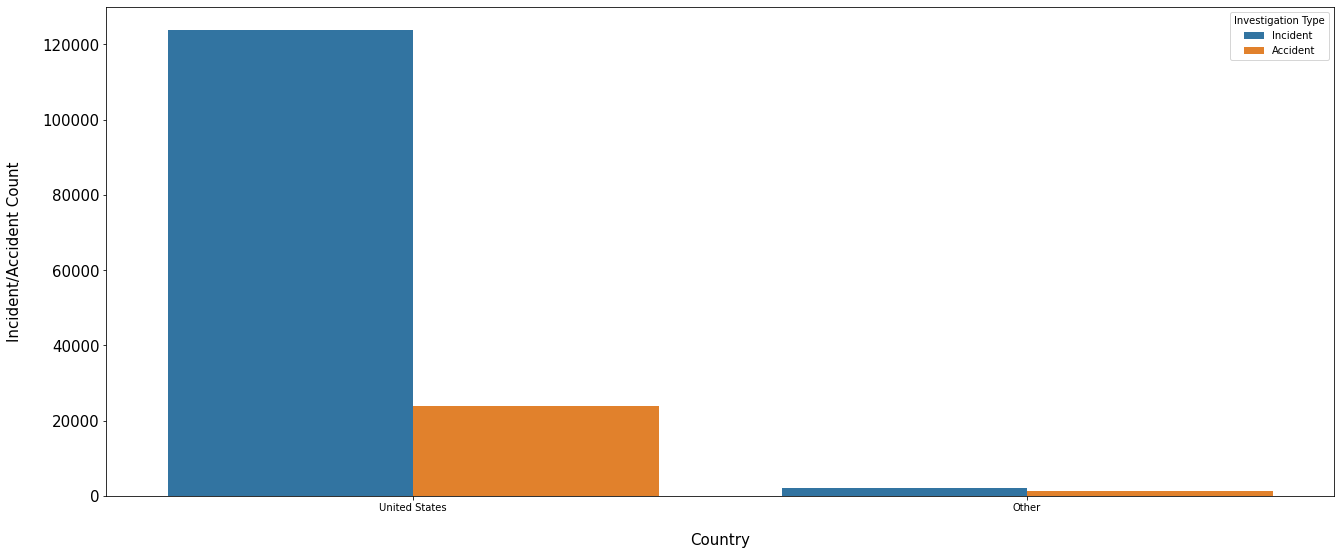

In [ ]:
# Countplot for accident vs inference in the united states

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Country', hue='Investigation Type', data=data)

plt.xlabel('Country', size=15, labelpad=20)
plt.ylabel('Incident/Accident Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)



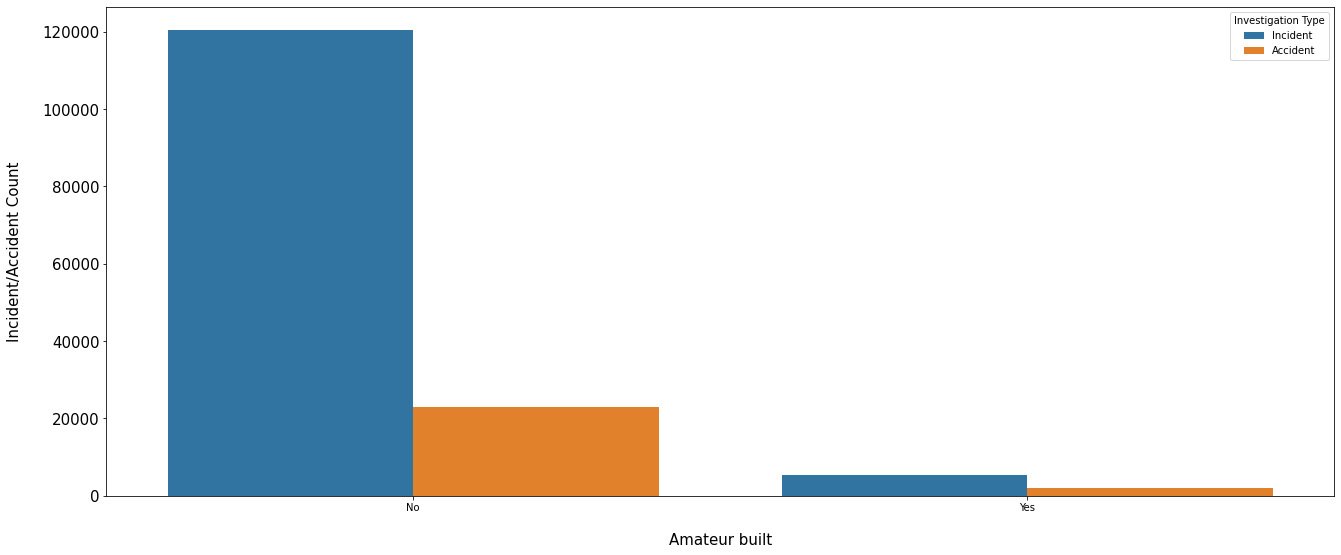

In [ ]:
# Countplot for the relationship between Amateur Built and Investigation Type
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Amateur Built', hue='Investigation Type', data=data)

plt.xlabel('Amateur built', size=15, labelpad=20)
plt.ylabel('Incident/Accident Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

# It turns out that Amateur built engines are not responsible for accidents

In [ ]:
data=data.drop(['Accident Number'],axis=1)

In [ ]:
data.head(10)

,No Of Deaths,Injuries,Investigation Type,Country,Injury Severity,Make,Amateur Built,Number of Engines,Total Uninjured,Event Year
0,0.0,0.0,Incident,United States,N,PIPER,No,1.0,2.0,2007.0
1,0.0,0.0,Incident,Other,N,CESSNA,No,1.0,1.0,2007.0
2,0.0,0.0,Incident,United States,N,LEROHL,Yes,1.0,1.0,2007.0
3,1.0,1.0,Accident,United States,F,CIRRUS DESIGN CORP.,No,1.0,0.0,2007.0
4,3.0,3.0,Accident,United States,F,BELL,No,1.0,0.0,2007.0
5,0.0,0.0,Incident,United States,N,PIPER,No,1.0,5.0,2007.0
6,0.0,0.0,Incident,United States,N,ERCOUPE (ENG & RESEARCH CORP.),No,1.0,2.0,2007.0
7,0.0,0.0,Incident,United States,N,CESSNA,No,1.0,1.0,2007.0
8,1.0,4.0,Accident,United States,F,BELL,No,1.0,0.0,2007.0
9,2.0,2.0,Accident,United States,F,ALTHOUSE,Yes,1.0,0.0,2007.0


In [ ]:
# finding correlation
data_corr=data.corr().abs()
data_corr

,No Of Deaths,Injuries,Number of Engines,Total Uninjured,Event Year
No Of Deaths,1.000000,0.172156,0.049265,0.007756,0.029929
Injuries,0.172156,1.000000,0.037301,0.016139,0.127464
Number of Engines,0.049265,0.037301,1.000000,0.408652,0.196625
Total Uninjured,0.007756,0.016139,0.408652,1.000000,0.124775
Event Year,0.029929,0.127464,0.196625,0.124775,1.000000


<Axes: >

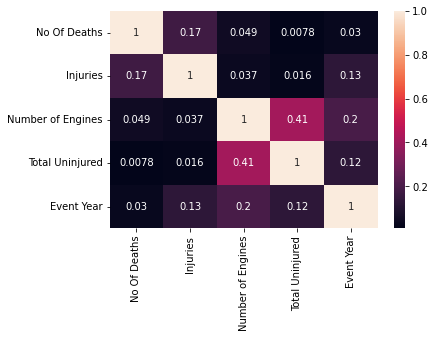

In [ ]:
sns.heatmap(data_corr,annot=True)

<Axes: >

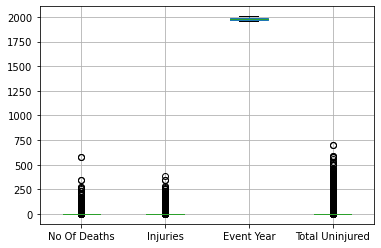

In [ ]:
data.boxplot(column=['No Of Deaths','Injuries','Event Year','Total Uninjured'])

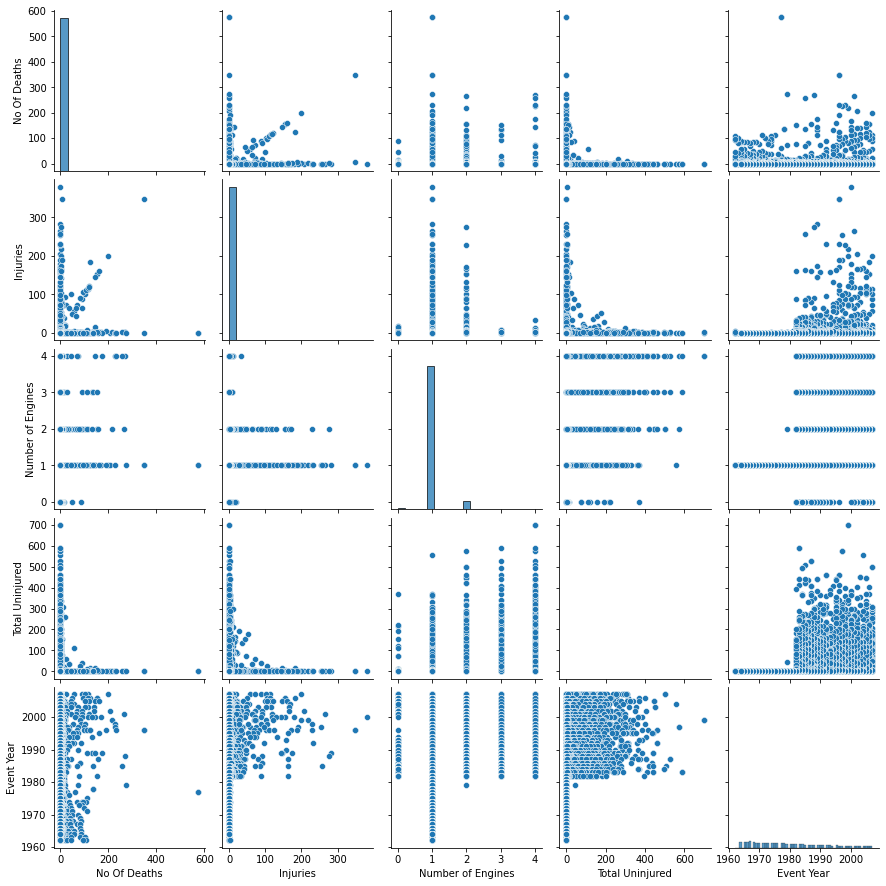

In [ ]:
sns.pairplot(data)

Inferences

In [ ]:
#1)Amateur built engines are not responsible for accidents

#2)Mostly thhe injuries were not fatal, that is number of accident< no. of incidents

#3)#Most of the accidents are in VMC conditions, VMC causes many incidents too
   #what can we be sure of is that VMC weather conditions affect the vehicles

#4)half of the amateurly bulit ones led to Substantial damage(3700 out of 7400 amateur built)
   #we could say that if a engine is built amateurly then there's a 75-80 percent chance of it being damaged
   #substantially or being destroyed(5500 out of 7400)


#5)And if the Injury is 'Fatal', The type of Investigation would most probably be Accident
   #So we could fill the Investigation Type feature based on this aspect



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


In [ ]:
data

,No Of Deaths,Injuries,Investigation Type,Country,Injury Severity,Make,Amateur Built,Number of Engines,Total Uninjured,Event Year
0,0.0,0.0,Incident,United States,N,PIPER,No,1.0,2.0,2007.0
1,0.0,0.0,Incident,Other,N,CESSNA,No,1.0,1.0,2007.0
2,0.0,0.0,Incident,United States,N,LEROHL,Yes,1.0,1.0,2007.0
3,1.0,1.0,Accident,United States,F,CIRRUS DESIGN CORP.,No,1.0,0.0,2007.0
4,3.0,3.0,Accident,United States,F,BELL,No,1.0,0.0,2007.0
...,...,...,...,...,...,...,...,...,...,...
150300,0.0,0.0,Incident,United States,N,DOUGLAS,No,1.0,0.0,1964.0
150327,0.0,0.0,Incident,Other,N,BOEING 707,No,1.0,0.0,1964.0
150338,0.0,0.0,Incident,United States,N,DOUGLAS,No,1.0,0.0,1964.0
150363,0.0,0.0,Incident,Other,N,CANADAIR,No,1.0,0.0,1964.0


In [ ]:
data['Amateur Built'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
hot_encoding = {'Yes' : 1, 'No': 0}
data['Amateur Built'] = data['Amateur Built'].map(hot_encoding)

In [ ]:
data['Country'].unique()

array(['United States', 'Other'], dtype=object)

In [ ]:
hot_encoding = {'United States': 1, 'Other': 0}
data['Country'] = data['Country'].map(hot_encoding)


In [ ]:
data['Amateur Built'].unique()

array([0, 1])

In [ ]:
data

,No Of Deaths,Injuries,Investigation Type,Country,Injury Severity,Make,Amateur Built,Number of Engines,Total Uninjured,Event Year
0,0.0,0.0,Incident,1,N,PIPER,0,1.0,2.0,2007.0
1,0.0,0.0,Incident,0,N,CESSNA,0,1.0,1.0,2007.0
2,0.0,0.0,Incident,1,N,LEROHL,1,1.0,1.0,2007.0
3,1.0,1.0,Accident,1,F,CIRRUS DESIGN CORP.,0,1.0,0.0,2007.0
4,3.0,3.0,Accident,1,F,BELL,0,1.0,0.0,2007.0
...,...,...,...,...,...,...,...,...,...,...
150300,0.0,0.0,Incident,1,N,DOUGLAS,0,1.0,0.0,1964.0
150327,0.0,0.0,Incident,0,N,BOEING 707,0,1.0,0.0,1964.0
150338,0.0,0.0,Incident,1,N,DOUGLAS,0,1.0,0.0,1964.0
150363,0.0,0.0,Incident,0,N,CANADAIR,0,1.0,0.0,1964.0


In [ ]:
X = data.drop(['Investigation Type','Injury Severity','Make'],axis=1)
y=data['Investigation Type']

In [ ]:
X

,No Of Deaths,Injuries,Country,Amateur Built,Number of Engines,Total Uninjured,Event Year
0,0.0,0.0,1,0,1.0,2.0,2007.0
1,0.0,0.0,0,0,1.0,1.0,2007.0
2,0.0,0.0,1,1,1.0,1.0,2007.0
3,1.0,1.0,1,0,1.0,0.0,2007.0
4,3.0,3.0,1,0,1.0,0.0,2007.0
...,...,...,...,...,...,...,...
150300,0.0,0.0,1,0,1.0,0.0,1964.0
150327,0.0,0.0,0,0,1.0,0.0,1964.0
150338,0.0,0.0,1,0,1.0,0.0,1964.0
150363,0.0,0.0,0,0,1.0,0.0,1964.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()


In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9989731699238158


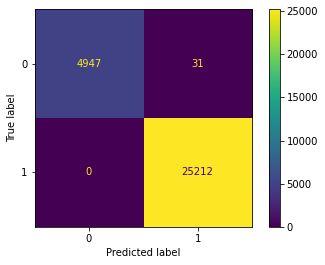

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();